In [13]:
import numpy as np

In [14]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [15]:
weights = np.random.randn(4)
bias = np.random.randn(1)

In [16]:
weights

array([ 0.65581445, -1.10846138,  0.9474938 , -0.19784289])

In [17]:
bias

array([1.95052788])

In [56]:
def conv2d(image, kernel):
    imx, imy = image.shape
    kx, ky = kernel.shape

    output = np.zeros((imx - kx + 1, imy-ky + 1))

    for i in range(imx - kx +1):
        for j in range(imy - ky + 1):
            output[i, j] = np.sum(image[i:i+kx, j:j+ky] * kernel)

    return output

In [31]:
def relu(x):
    return np.maximum(0, x)

In [49]:
def max_pooling(input, size=2, stride=2):
    x, y = input.shape

    output_x = x // stride
    output_y = y // stride

    output = np.zeros((output_x, output_y))

    for i in range(0, x, stride):
        for j in range(0, y, stride):
            output[i//stride, j//stride] = np.max(input[i:i+size, j:j+size])
    
    return output

In [33]:
from PIL import Image

image = np.array(Image.open(r"C:\Users\saive\OneDrive\Desktop\rubiks_cube.jpg").convert("L"))

In [34]:
print(image.shape)
print(kernel.shape)

(410, 728)
(3, 3)


In [35]:
image

array([[ 28,  29,  31, ...,  85,  85,  85],
       [ 28,  29,  31, ...,  82,  82,  82],
       [ 28,  29,  31, ...,  77,  77,  77],
       ...,
       [ 53,  20,  20, ..., 221, 210, 200],
       [ 48,  28,  32, ..., 233, 234, 226],
       [ 48,  28,  32, ..., 225, 231, 228]], dtype=uint8)

In [57]:
output = conv2d(image, kernel)

In [58]:
output

array([[  9.,  12.,   9., ...,  -1.,  -1.,   0.],
       [  9.,  12.,   9., ...,  -1.,  -2.,  -1.],
       [  9.,  12.,   9., ...,  -1.,  -3.,  -2.],
       ...,
       [-50.,  41.,  76., ...,  80.,  23.,  24.],
       [-55.,  14.,  61., ..., 120.,  30., -11.],
       [-65., -23.,  39., ..., 127.,  40., -25.]])

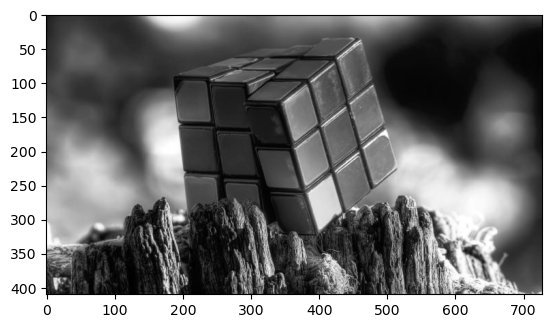

In [59]:
import matplotlib.pyplot as plt
# plt.imshow(output, cmap='gray')
plt.imshow(image, cmap='gray')

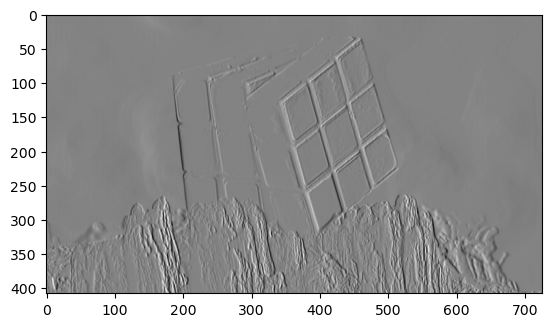

In [60]:
plt.imshow(output, cmap='gray')

In [61]:
relu_result = relu(output)

In [62]:
pooled_result = max_pooling(relu_result)

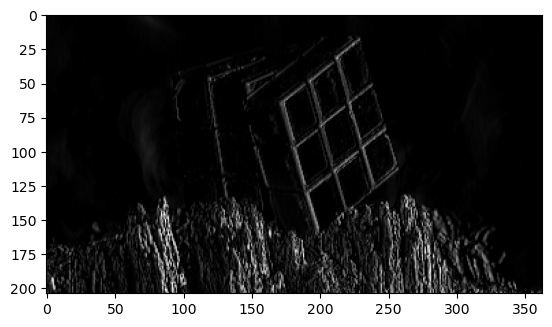

In [63]:
plt.imshow(pooled_result, cmap="grey")